In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [167]:
from sklearn.datasets import make_moons

In [228]:
n_samples = 1000

X, y = make_moons(
    n_samples,
    noise=0.1,
    random_state=42
)

In [229]:
X[0],y[0]

(array([-0.05146968,  0.44419863]), 1)

In [230]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


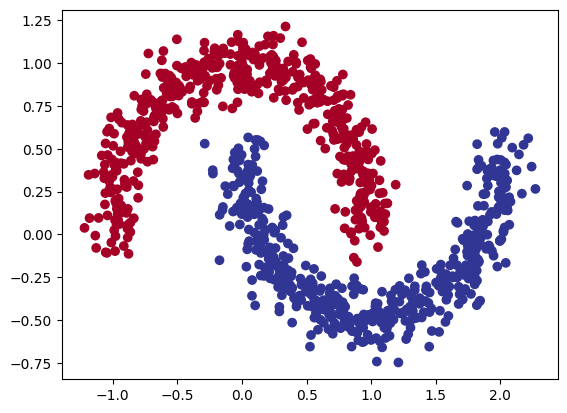

In [231]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdYlBu");

In [232]:
X.shape, y.shape

((1000, 2), (1000,))

In [233]:
len(X), len(y)

(1000, 1000)

In [234]:
X[4], y[4]

(array([-0.83343911,  0.53505665]), 0)

In [235]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [236]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["accuracy"])

history = model.fit(X, y, epochs=100, callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8450
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.8910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.8970
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9080
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9200
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9410
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9490
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9910
Epoch 11/

In [237]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000


[0.004657412879168987, 1.0]

Text(0.5, 0, 'epochs')

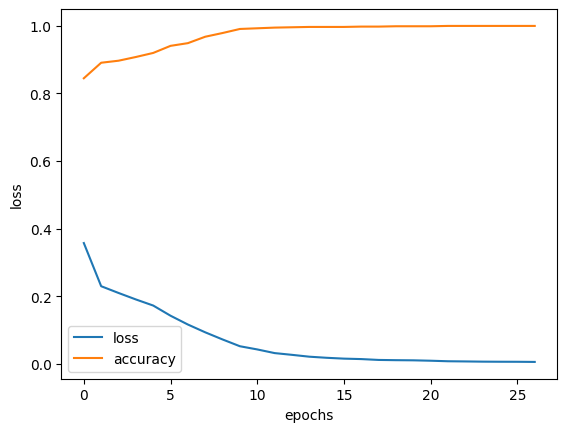

In [238]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [239]:
def plot_decision_boundary(model,X,y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


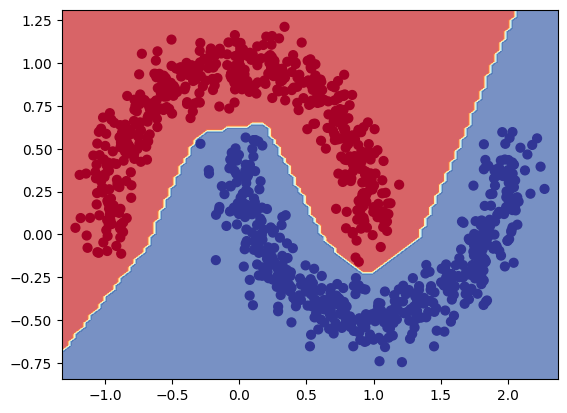

In [240]:
plot_decision_boundary(model=model,X=X,y=y)